# EDA on Heart Disease Dataset

Sequence of points to be covered:
1. Import required library
2. Loading data into dataframe
3. Checking type of data
4. Dropping irrelevant columns
5. Rename the columns 
6. Dropping the duplicate rows
7. Managing missing or null values
8. Detecting outliers
9. Plotting graphs
10. Create a basic ML model

In [71]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [72]:
df = pd.read_csv("../datasets/heartDisease.csv")

In [73]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [74]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [76]:
# fix spaces in columns names 
df.columns = df.columns.str.strip()
df.columns 

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [77]:
# dropping irrelevant column
columns = ['fbs']
# all are important parameters but while droping outliers column "fbs" gets NaN value
df.drop(columns = columns, inplace = True)

In [78]:
df.head()

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,1,163,1,0.6,2,0,2,1


In [79]:
# rename the columns
columns = {
}
# no need to rename the columns
df.rename(columns = columns, inplace = True)

In [80]:
df.head()

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,1,163,1,0.6,2,0,2,1


In [81]:
# dropping duplicates 
df.duplicated().sum()

1

In [82]:
df[df.duplicated()]

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,1,173,0,0.0,2,4,2,1


In [83]:
df.drop_duplicates(inplace = True)

In [84]:
df.duplicated().sum()

0

In [85]:
# managing missing or null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [86]:
df.shape

(302, 13)

{'whiskers': [<matplotlib.lines.Line2D at 0x1fcb441c5e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1fcb2ecd9c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fcb441c0a0>,
 'medians': [<matplotlib.lines.Line2D at 0x1fcb2ecd450>,
 'fliers': [<matplotlib.lines.Line2D at 0x1fcb2ecd300>,
 'means': []}

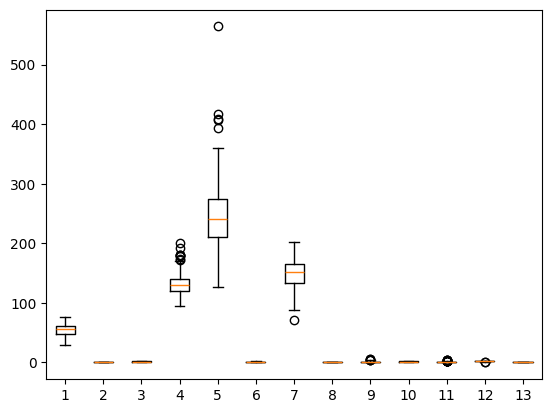

In [87]:
# detecting outliers
plt.boxplot(df)

In [88]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [89]:
column = ['age', 'sex', 'cp', 'trestbps', 'chol', 'restecg', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal']

for col in column:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    
    lowerBound = q1 - 1.5 * iqr
    upperBound = q3 + 1.5 * iqr
    df = df[(df[col] > lowerBound) & (df[col] < upperBound)]
    
    # df = df[~((df < (q1 - 1.5 * iqr)) |(df > (q3 + 1.5 * iqr))).any(axis=1)]
    

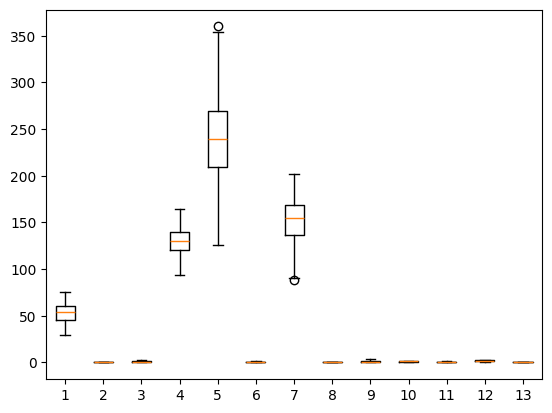

In [90]:
plt.boxplot(df)
plt.show()

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.080483,-0.041380,0.264313,0.136834,-0.079427,-0.404562,0.082238,0.187489,-0.137885,0.389055,0.055024,-0.195844
sex,-0.080483,1.000000,-0.109112,-0.003327,-0.144968,-0.082088,-0.058481,0.181764,0.175788,-0.059132,0.103917,0.232001,-0.333184
cp,-0.041380,-0.109112,1.000000,0.097476,-0.041923,0.070806,0.273469,-0.360448,-0.092351,0.084927,-0.195168,-0.212164,0.406835
trestbps,0.264313,-0.003327,0.097476,1.000000,0.082098,-0.091554,-0.038701,-0.038894,0.126840,-0.017603,0.055294,-0.026776,-0.062456
chol,0.136834,-0.144968,-0.041923,0.082098,1.000000,-0.118915,0.004909,0.051941,-0.024938,0.080660,0.110731,0.071531,-0.076330
restecg,-0.079427,-0.082088,0.070806,-0.091554,-0.118915,1.000000,0.065333,-0.080592,-0.068126,0.109013,-0.075171,0.070480,0.132095
thalach,-0.404562,-0.058481,0.273469,-0.038701,0.004909,0.065333,1.000000,-0.417648,-0.340450,0.376679,-0.248220,-0.143329,0.405610
exang,0.082238,0.181764,-0.360448,-0.038894,0.051941,-0.080592,-0.417648,1.000000,0.321054,-0.264602,0.168415,0.265143,-0.417015
oldpeak,0.187489,0.175788,-0.092351,0.126840,-0.024938,-0.068126,-0.340450,0.321054,1.000000,-0.541607,0.257177,0.189242,-0.429550
slope,-0.137885,-0.059132,0.084927,-0.017603,0.080660,0.109013,0.376679,-0.264602,-0.541607,1.000000,-0.063090,-0.069436,0.312806


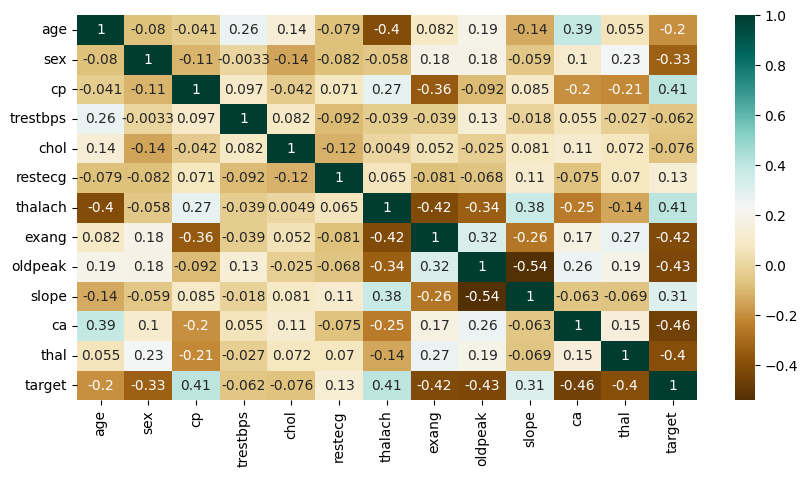

In [91]:
# heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),cmap="BrBG",annot=True)
df.corr()

In [92]:
df.head()

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,1,163,1,0.6,2,0,2,1


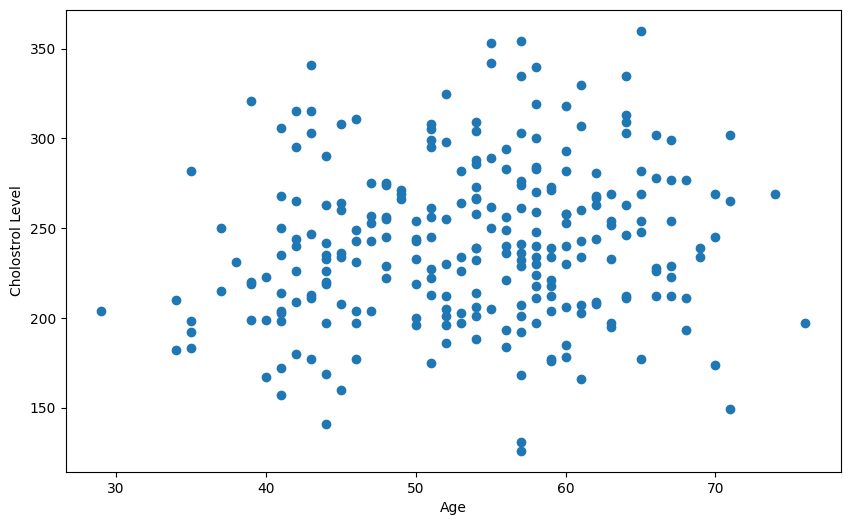

In [93]:
# scatter plot
plt.subplots(figsize=(10,6))
plt.scatter(df['age'], df['chol'])
plt.xlabel('Age')
plt.ylabel('Cholostrol Level')
plt.show()

In [94]:
x = df.iloc[:,:-1]
x.head()

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,0,150,0,2.3,0,0,1
1,37,1,2,130,250,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,172,0,1.4,2,0,2
3,56,1,1,120,236,1,178,0,0.8,2,0,2
4,57,0,0,120,354,1,163,1,0.6,2,0,2


In [95]:
y = df.iloc[:,-1]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [96]:
df.to_csv("../datasets/cleaned_heartDisease.csv", index=False)

### Algorithm used for classification problem
1. Logistic regression
2. Support vector machines
3. K-nearest neighbors (KNN) models
4. Artificial neural networks (ANN)
5. Random forest
6. Boosted trees
7. Naive Bayes

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [98]:
scaler = StandardScaler()
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=47)
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [99]:
model = LogisticRegression()
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)
accuracy = accuracy_score(ytest, ypred)
print("Accuracy:", accuracy) 

Accuracy: 0.859375


In [100]:
model = SVC()
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)
accuracy = accuracy_score(ytest, ypred)
print("Accuracy:", accuracy) 

Accuracy: 0.84375


In [101]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)
accuracy = accuracy_score(ytest, ypred)
print("Accuracy:", accuracy) 

Accuracy: 0.859375


In [102]:
model = GaussianNB()
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)
accuracy = accuracy_score(ytest, ypred)
print("Accuracy:", accuracy) 

Accuracy: 0.828125


In [103]:
model = xgb.XGBClassifier() 
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)
accuracy = accuracy_score(ytest, ypred)
print("Accuracy:", accuracy) 

Accuracy: 0.890625


In [104]:
model = RandomForestClassifier(n_estimators=100)
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)
accuracy = accuracy_score(ytest, ypred)
print("Accuracy:", accuracy) 

Accuracy: 0.890625


In [106]:
# Pickling model

import pickle

pickle.dump(scaler, open('../models/scaler.pkl','wb'))
pickle.dump(model, open('../models/Model.pkl','wb'))